In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ba = pd.read_csv("../assets/bill_amount.csv",)
bid = pd.read_csv("../assets/bill_id.csv")
cd = pd.read_csv("../assets/clinical_data.csv")
demo = pd.read_csv("../assets/demographics.csv")

In [3]:
ba.isnull().sum()/ba.shape[0]
ba.dtypes
bid.isnull().sum()/bid.shape[0]
bid.dtypes

bill_id               int64
patient_id           object
date_of_admission    object
dtype: object

In [4]:
bid.date_of_admission = pd.to_datetime(bid.date_of_admission)

In [5]:
cd.isnull().sum()/cd.shape[0]

id                    0.000000
date_of_admission     0.000000
date_of_discharge     0.000000
medical_history_1     0.000000
medical_history_2     0.068529
medical_history_3     0.000000
medical_history_4     0.000000
medical_history_5     0.089412
medical_history_6     0.000000
medical_history_7     0.000000
preop_medication_1    0.000000
preop_medication_2    0.000000
preop_medication_3    0.000000
preop_medication_4    0.000000
preop_medication_5    0.000000
preop_medication_6    0.000000
symptom_1             0.000000
symptom_2             0.000000
symptom_3             0.000000
symptom_4             0.000000
symptom_5             0.000000
lab_result_1          0.000000
lab_result_2          0.000000
lab_result_3          0.000000
weight                0.000000
height                0.000000
dtype: float64

In [6]:
cd.dtypes

id                     object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object

In [7]:
cd.date_of_admission = pd.to_datetime(cd.date_of_admission)
cd.date_of_discharge = pd.to_datetime(cd.date_of_discharge)

In [8]:
cd.medical_history_3.value_counts()

0      2176
No      761
1       348
Yes     115
Name: medical_history_3, dtype: int64

In [9]:
cd.medical_history_3 = cd.medical_history_3.map({"No":0, "Yes":1, "0":0, "1":1})

In [10]:
cd.medical_history_2.value_counts()

0.0    2181
1.0     986
Name: medical_history_2, dtype: int64

In [11]:
cd.medical_history_5.value_counts()

0.0    2898
1.0     198
Name: medical_history_5, dtype: int64

In [21]:
# cd.medical_history_2 = cd.medical_history_2.astype('int')
# cd.medical_history_5 = cd.medical_history_5.astype('int')

In [12]:
demo.isnull().sum()/demo.shape[0]

patient_id         0.0
gender             0.0
race               0.0
resident_status    0.0
date_of_birth      0.0
dtype: float64

In [13]:
demo.dtypes

patient_id         object
gender             object
race               object
resident_status    object
date_of_birth      object
dtype: object

In [14]:
demo.date_of_birth = pd.to_datetime(demo.date_of_birth)
demo.gender.value_counts()

Female    1396
Male      1333
m          170
f          101
Name: gender, dtype: int64

In [15]:
demo.resident_status.value_counts()

Singaporean          1782
Singapore citizen     610
PR                    465
Foreigner             143
Name: resident_status, dtype: int64

In [16]:
demo.race.value_counts()

Chinese    1608
Malay       629
chinese     307
Indian      195
Others      161
India       100
Name: race, dtype: int64

In [17]:
demo.gender = demo.gender.apply(lambda x: "f" if x=="Female" else "m" if x=="Male" else x)
demo.resident_status = demo.resident_status.apply(lambda x: "Singaporean" if x=="Singapore citizen" else x)
demo.race = demo.race.apply(lambda x: "Chinese" if x=="chinese" else "Indian" if x=="India" else x)

In [18]:
bill_df = ba.merge(bid,on="bill_id").copy(deep=True)

In [19]:
cd.rename(columns={'id':'patient_id'}, inplace=True)

In [20]:
patient_df = cd.merge(demo,on="patient_id").copy(deep=True)

In [21]:
#let's make an age column from the birthdate
patient_df["age"] = pd.datetime.now().date() - patient_df["date_of_birth"]
#change timedelta dtype to years (int)
patient_df.age = patient_df["age"].apply(lambda x: x.days/365)

In [22]:
#make total_days from date of admission and discharge
patient_df["total_days"] = patient_df.apply(lambda x: (x["date_of_discharge"] - x["date_of_admission"]).days,axis=1)

In [23]:
patient_df.dtypes

patient_id                    object
date_of_admission     datetime64[ns]
date_of_discharge     datetime64[ns]
medical_history_1              int64
medical_history_2            float64
medical_history_3              int64
medical_history_4              int64
medical_history_5            float64
medical_history_6              int64
medical_history_7              int64
preop_medication_1             int64
preop_medication_2             int64
preop_medication_3             int64
preop_medication_4             int64
preop_medication_5             int64
preop_medication_6             int64
symptom_1                      int64
symptom_2                      int64
symptom_3                      int64
symptom_4                      int64
symptom_5                      int64
lab_result_1                 float64
lab_result_2                 float64
lab_result_3                 float64
weight                       float64
height                       float64
gender                        object
r

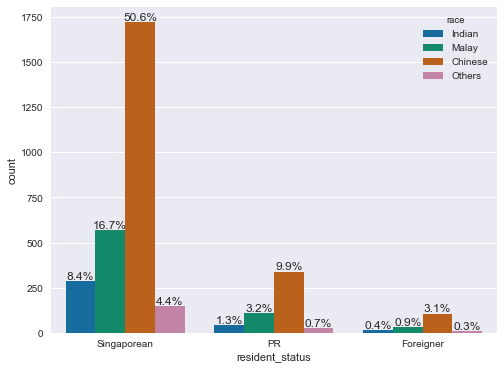

In [24]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="resident_status", data=patient_df, hue="race",palette="colorblind")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(patient_df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

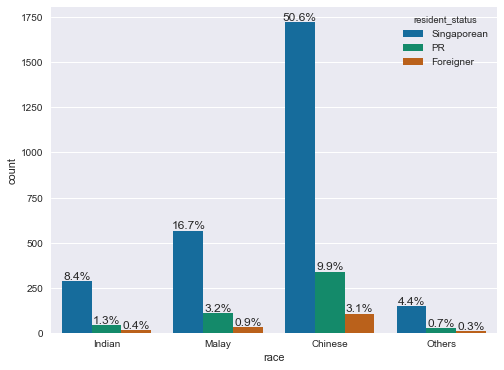

In [25]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="race", data=patient_df, hue="resident_status",palette="colorblind")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(patient_df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [32]:
df = bill_df.merge(patient_df,on=["patient_id","date_of_admission"])

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(13600, 34)

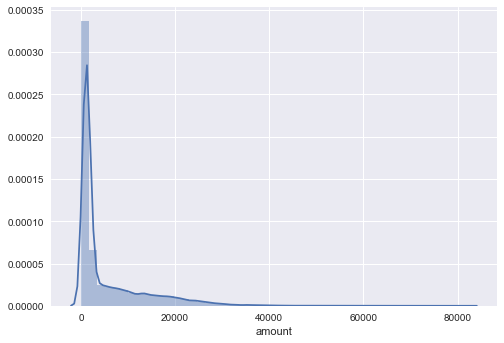

In [35]:
sns.distplot(df.amount)

In [60]:
df[(df["amount"]>13000) & (df["resident_status"]=="Singaporean")]["race"].value_counts()/df["race"].value_counts()

Chinese    0.095452
Malay      0.163013
Indian     0.149709
Others     0.101093
Name: race, dtype: float64

In [56]:
df[df["amount"]>13000].tail(1)

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,age,total_days
13597,2727258154,18386.672482,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1.0,0,0,0.0,...,29.4,115.0,77.8,175.0,m,Malay,Singaporean,1972-01-04,45,14


In [47]:
df.amount.describe()

count    13600.000000
mean      5464.767783
std       7717.479509
min         79.496707
25%        950.689008
50%       1516.951136
75%       7307.056573
max      81849.751340
Name: amount, dtype: float64

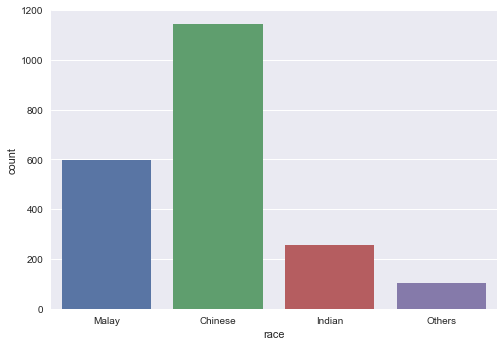

In [58]:
sns.countplot(df[df["amount"]>13000]["race"])

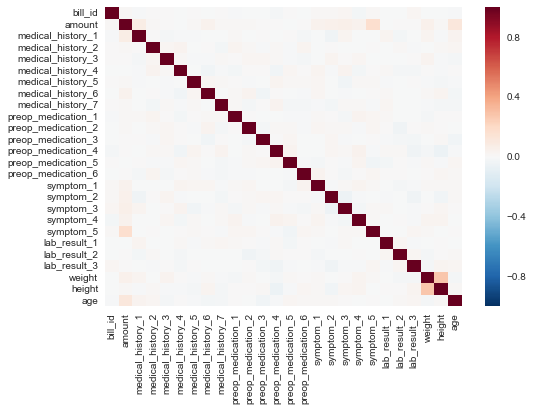

In [117]:
sns.heatmap(df.corr())

ValueError: Could not interpret input 'age'

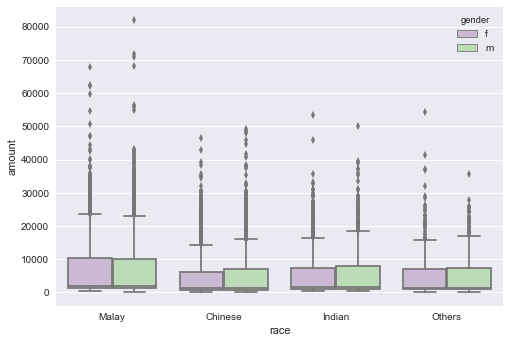

In [90]:
sns.boxplot(x="race", y="amount", hue="gender", data=df, palette="PRGn")

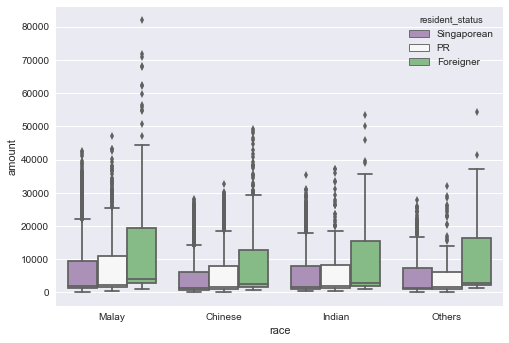

In [129]:
sns.boxplot(x="race", y="amount", hue="resident_status", data=df, palette="PRGn")

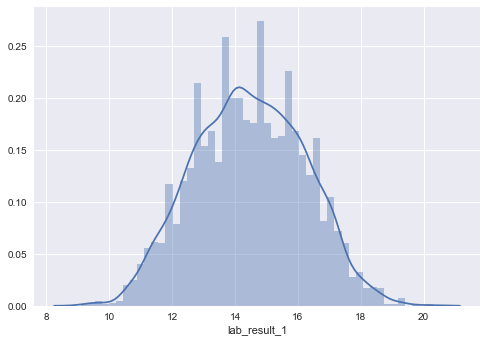

In [93]:
sns.distplot(df.lab_result_1)

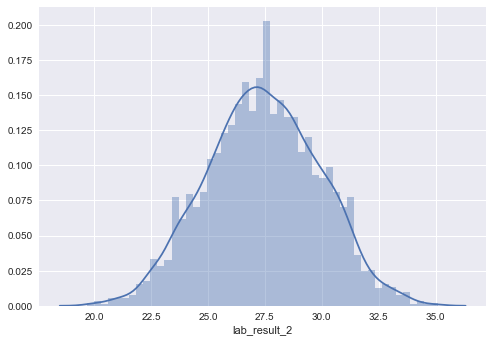

In [94]:
sns.distplot(df.lab_result_2)

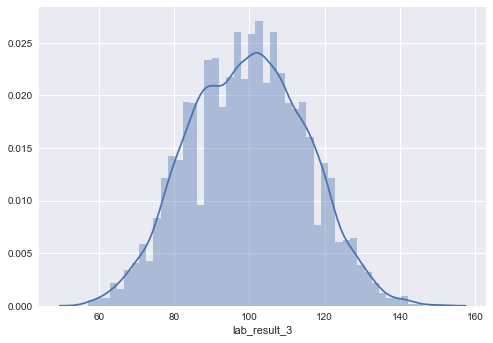

In [95]:
sns.distplot(df.lab_result_3)

In [106]:
df.medical_history_1.value_counts()/len(df)

0    0.828502
1    0.171498
Name: medical_history_1, dtype: float64

In [107]:
df.medical_history_2.value_counts()/len(df)

0    0.68254
1    0.31746
Name: medical_history_2, dtype: float64

In [108]:
df.medical_history_3.value_counts()/len(df)

0    0.862664
1    0.137336
Name: medical_history_3, dtype: float64

In [109]:
df.medical_history_4.value_counts()/len(df)

0    0.94548
1    0.05452
Name: medical_history_4, dtype: float64

In [110]:
df.medical_history_5.value_counts()/len(df)

0    0.935128
1    0.064872
Name: medical_history_5, dtype: float64

In [111]:
df.medical_history_6.value_counts()/len(df)

0    0.743616
1    0.256384
Name: medical_history_6, dtype: float64

In [112]:
df.medical_history_7.value_counts()/len(df)

0    0.746032
1    0.253968
Name: medical_history_7, dtype: float64

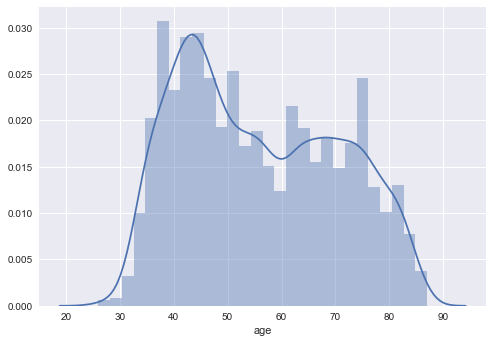

In [123]:
sns.distplot(df.age)

In [124]:
np.mean(df.age)

55.8592132505176

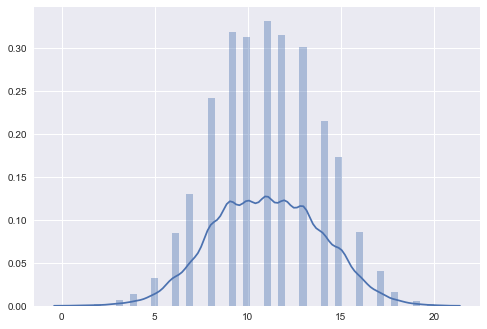

In [126]:
sns.distplot(df.total_days)

In [127]:
np.mean(df.total_days)

11.045893719806763

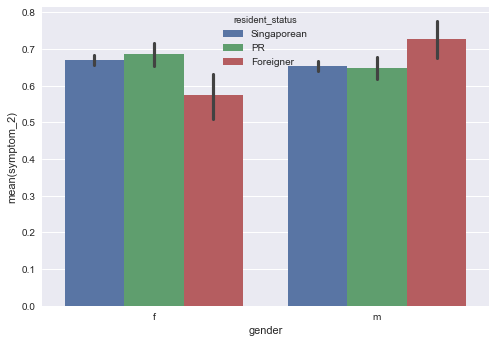